<h1> Network Property Analysis

The code in this notebook contains functions used to analyse the different properties fractal and non-fractal networks, and to validate theories about the origins of fractality in complex networks. 

In [1]:
import fractalnetworks as fn

In [2]:
# Network analysis modules
from igraph import Graph
import igraph
import networkx as nx

# Mathematics modules
import heapq
import math
import numpy as np
from scipy.io import mmread
import random

# Visualisation modules
import matplotlib.pyplot as plt
import seaborn as sb

# Other modules
import time
import itertools
import pandas as pd

For this section we use the following example Erdős-Rényi network, which we can visualise using `fn.display_network`.

In [3]:
help(fn.display_network)

Help on function display_network in module fractalnetworks.utilities:

display_network(G, save_path=None, plot=True)
    Displays a given network.
    
    Args:
        G (igraph.Graph)                 : The network to be displayed.
        save_path (:obj:`str`, optional) : The filepath to save the figure to, if given. Default is None.
        plot (:obj:`bool`, optional)     : If True, the network is displayed inline. Default is True.



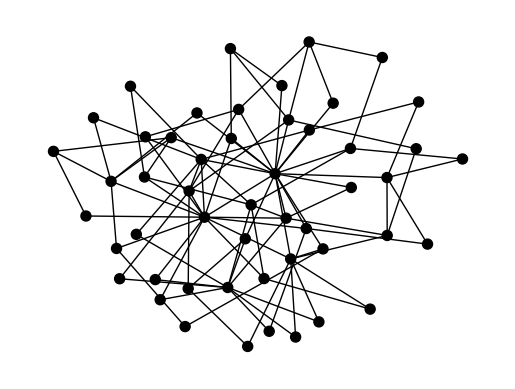

In [4]:
G = igraph.Graph.Barabasi(50,2)
fn.display_network(G)

<h2> Key Network Properties

The functions `fn.find_degree_distribution`, `fn.find_betweenness_centralities`, `fn.find_edge_betweenness_centralities` and `fn.find_clustering_coefficient` can be used to find key attributes of the network.

The first two of these return lists, where the $i$-th element is the degree/betweenness centrality of the $i$-th node.

In [10]:
help(fn.find_degree_distribution)

Help on function find_degree_distribution in module fractalnetworks.hubrepulsion:

find_degree_distribution(G)
    Calculates the degree distribution of the network.
    
    Returns:
        (list): A list of degrees in the network. The i-th value is the degree of the i-th node.



In [12]:
fn.find_degree_distribution(G)

[8,
 15,
 18,
 6,
 8,
 6,
 3,
 6,
 4,
 4,
 10,
 2,
 3,
 4,
 2,
 4,
 5,
 3,
 3,
 5,
 4,
 3,
 2,
 6,
 3,
 2,
 4,
 3,
 3,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [14]:
help(fn.find_betweenness_centralities)

Help on function find_betweenness_centralities in module fractalnetworks.betweennesscentrality:

find_betweenness_centralities(G)
    Calculates the normalised betweenness centrality distribution of the network.
    
    Args:
        G (igraph.Graph) : The network to be analysed.
    
    Returns:
        (list) : A list of betweenness centralities in the network.
                 The i-th value is the betweenness centrality of the i-th node.



In [17]:
fn.find_betweenness_centralities(G)

[0.13368335887468538,
 0.28206495413128063,
 0.42432981323287455,
 0.04075531658439821,
 0.10734540638877373,
 0.06221447675529309,
 0.021338475866537088,
 0.04252409297052153,
 0.02446104066002025,
 0.01577846048509314,
 0.07187147933321401,
 0.0029667422524565375,
 0.018235746679624232,
 0.04923765293663252,
 0.0,
 0.02469968145988554,
 0.0543259367238959,
 0.0028425655976676385,
 0.022045690987017516,
 0.05294151238028788,
 0.02981656948493683,
 0.006338304552590266,
 0.0009576449627470033,
 0.027712315084764065,
 0.024163832199546483,
 0.0019061791383219954,
 0.05782295227448289,
 0.0018424036281179136,
 0.011829419163602837,
 0.0030409782960803375,
 0.010523971493359248,
 0.002197703090560233,
 0.0030169990629174298,
 0.004109977324263038,
 0.004125784929356358,
 0.006717687074829932,
 0.008062709210668394,
 0.0029761904761904765,
 0.003069322967282151,
 0.015972222222222224,
 0.0028520138214015766,
 0.001982777237879279,
 0.001982777237879279,
 0.003769841269841269,
 0.0012046485

We can visualise these distributions with the functions `fn.plot_degree_distribution` and `fn.plot_betweenness_centrality`

In [23]:
help(fn.plot_degree_distribution)

Help on function plot_degree_distribution in module fractalnetworks.betweennesscentrality:

plot_degree_distribution(G, degrees=None, save_path=None, plot=True)
    Plots the degree distribution of a given network on a histogram.
    
    Args:
        G (igraph.Graph)                 : The network to be analysed.
        degrees (:obj:`list`, optional)  : A list of degrees in the network.
                                           If already calculated, this parameter can be passed to prevent duplication.
                                           Default is None, in which case the distribution is calculated.
        save_path (:obj:`str`, optional) : If a save path is given then the histogram is saved as a .png file.
                                           Default is None.
        plot (:obj:`bool`, optional)     : If True, a histogram of the degree distribution is displayed.
                                           Default is True.



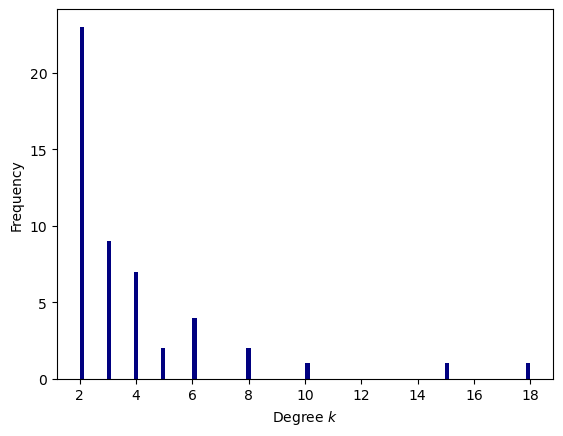

In [26]:
fn.plot_degree_distribution(G)

In [29]:
help(fn.plot_betweenness_centralities)

Help on function plot_betweenness_centralities in module fractalnetworks.betweennesscentrality:

plot_betweenness_centralities(G, bcs=None, save_path=None, plot=True)
    Plots the betweenness centrality distribution of a given network on a histogram.
    
    Args:
        G (igraph.Graph)                 : The network to be analysed.
        bcs (:obj:`list`, optional)      : A list of betweenness centralities in the network.
                                           If already calculated, this parameter can be passed to prevent duplication.
                                           Default is None, in which case the distribution is calculated.
        save_path (:obj:`str`, optional) : If a save path is given then the histogram is saved as a .png file.
                                           Default is None.
        plot (:obj:`bool`, optional)     : If True, a histogram of the betweenness centrality distribution is displayed.
                                           Default 

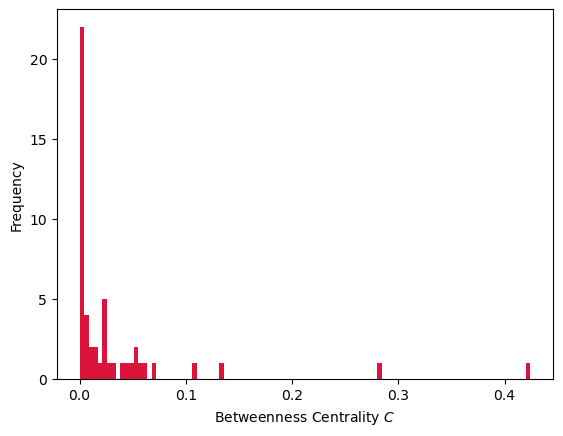

In [31]:
fn.plot_betweenness_centralities(G)

If you need to perform multiple analysis functions on the same graph you can pass precalculated distributions to many functions. This prevents recalculating values which can be costly. 

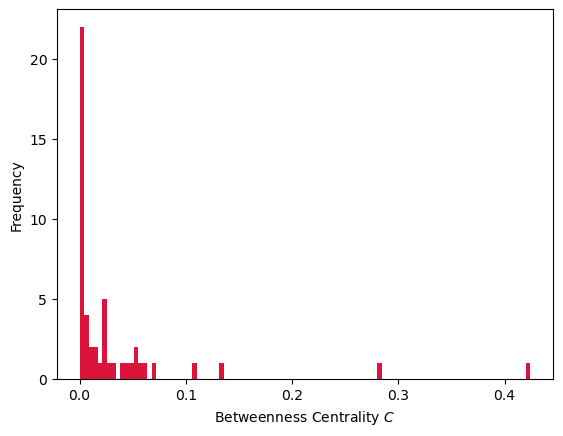

In [33]:
bcs = fn.find_betweenness_centralities(G)
fn.plot_betweenness_centralities(G, bcs=bcs)

`fn.find_edge_betweenness_centralities` returns a list where the $i$-th element is the edge betweenness centrality of the $i$-th edge.

In [36]:
help(fn.find_edge_betweenness_centralities)

Help on function find_edge_betweenness_centralities in module fractalnetworks.betweennesscentrality:

find_edge_betweenness_centralities(G)
    Calculates the normalised edge betweenness centrality distribution of the network.
    
    Args:
        G (igraph.Graph) : The network to be analysed.
    
    Returns:
        (list) : A list of edge betweenness centralities in the network.
                 The i-th value is the betweenness centrality of the i-th edge.



In [38]:
fn.find_edge_betweenness_centralities(G)

[0.0527171196150788,
 0.07094001010327543,
 0.06690217039196632,
 0.025693433550576412,
 0.023041717919268945,
 0.03363679404495731,
 0.055541830052034134,
 0.0439342403628118,
 0.024455084597941747,
 0.0396025267249757,
 0.018909620991253644,
 0.021162377305234452,
 0.01262494195147256,
 0.02339383972037035,
 0.027004838698716244,
 0.015275601949071339,
 0.031598245292122844,
 0.028802904578414792,
 0.023469063816002604,
 0.019142857142857142,
 0.02655328798185941,
 0.02700291545189506,
 0.02825850340136055,
 0.036340584585482553,
 0.04254503999401959,
 0.010027210884353743,
 0.029972789115646256,
 0.015893747975380623,
 0.04156948493683187,
 0.0250696469063816,
 0.05555004859086491,
 0.019751214771622942,
 0.016732750242954324,
 0.04508746355685131,
 0.01864685654481573,
 0.06656026513169369,
 0.01753056240811342,
 0.054152251376741165,
 0.011961127308066083,
 0.023545787545787542,
 0.018593406593406595,
 0.030379008746355688,
 0.011459669582118557,
 0.04101878846776805,
 0.009451247

`fn.find_clustering_coefficient` returns the transitivity $T$ of the network.

In [41]:
help(fn.find_clustering_coefficient)

Help on function find_clustering_coefficient in module fractalnetworks.networkproperties:

find_clustering_coefficient(G)
    Finds the clustering coefficient T of a given network.
    
    Args:
        G (igraph.Graph) : The network to be analysed.
    
    Returns:
        (float) : The clustering coefficient (transitivity) T of the network.



In [43]:
fn.find_clustering_coefficient(G)

0.06779661016949153

<h2>Hubs</h2>

Hubs are defined as nodes with degree greater than three standard deviations from the mean. We calculate this using the $Z$-score, defined as, 
\begin{equation}
    Z = \frac{k-\mu}{\sigma},
\end{equation}
where $k$ is the degree of the node, $\mu = \overline{k}$ is the mean degree in the network and $\sigma$ is the standard deviation of the degree distribution. 

Thus, hubs are those nodes with $Z$-score greater than 3. To find these hubs, use `fn.identify_hubs`.

In [46]:
help(fn.identify_hubs)

Help on function identify_hubs in module fractalnetworks.hubrepulsion:

identify_hubs(G, degrees=None)
    Identify the hubs of the network using the Z-score, where hubs are those nodes with Z > 3.
    
    Args:
        G (igraph.Graph)                : The network to be analysed.
        degrees (:obj:`list`, optional) : A list of degrees in the network.
                                          If already calculated, passing this parameter prevents duplication.
                                          Default is None, in which case the distribution is calculated.
    
    Returns:
        (list): A list of nodes with Z > 3.



In [48]:
fn.identify_hubs(G)

[1, 2]

Hubs can also be identified by the mean degree, where a hub is a node with degree greater than $2\mu$, where $\mu = \overline{k}$ is the mean degree in the network,  

In [54]:
help(fn.identify_hubs_by_mean)

Help on function identify_hubs_by_mean in module fractalnetworks.hubrepulsion:

identify_hubs_by_mean(G, degrees=None, factor=2)
    Identify the hubs of the network using the mean, where hubs are those nodes with degree greater than some factor
        (usually 2) times the mean.
    
    Args:
        G (igraph.Graph)                : The network to be analysed.
        degrees (:obj:`list`, optional) : A list of degrees in the network.
                                          If already calculated, passing this parameter prevents duplication.
                                          Default is None, in which case the distribution is calculated.
        factor (:obj:`int`, optional)   : The factor by which the mean is multiplied to identify hubs. Default is 2.
    
    Returns:
        (list) : A list of hubs.



In [50]:
fn.identify_hubs_by_mean(G)

[0, 1, 2, 4, 10]

or by their relative degree, where a hub is a node with betweenness centrality in the 90$^{\text{th}}$ percentile.

In [56]:
help(fn.identify_hubs_by_percentile)

Help on function identify_hubs_by_percentile in module fractalnetworks.hubrepulsion:

identify_hubs_by_percentile(G, degrees=None, percentile=90)
    Identify the hubs of the network by percentile, where hubs are those in some percentile of the degree distribution.
    
    Args:
        G (igraph.Graph)                  : The network to be analysed.
        degrees (:obj:`list`, optional)   : A list of degrees in the network.
                                            If already calculated, passing this parameter prevents duplication.
                                            Default is None, in which case the distribution is calculated.
        percentile (:obj:`int`, optional) : The percentile hubs belong to. Default is 90.
    
    Returns:
        (list): A list of hubs.



In [52]:
fn.identify_hubs_by_percentile(G)

[0, 4, 10, 1, 2]

**Measuring Hub-Hub Repulsion**

`fn.find_hub_hub_edges` returns the number of edges which connect a hub to another hub. If you want to use a specific method for finding hubs, you can either calculate the hubs before and pass the list as an argument, or pass the method you want to use. By default, if no hubs are passed it will use those found by `fn.identify_hubs`.

In [62]:
help(fn.find_hub_hub_edges)

Help on function find_hub_hub_edges in module fractalnetworks.hubrepulsion:

find_hub_hub_edges(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, degrees=None)
    Finds the number of edges in a network which connect hubs to other hubs.
    
    Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list`, optional)           : A list of hubs in the network.
                                                 If already calculated, passing this parameter prevents duplication.
                                                 Default is None, in which case the function finds the hubs.
        hub_method (:obj:`function`, optional) : Specifies the method used to find hubs.
                                                 Default is identify_hubs.
        degrees (:obj:`list`, optional)        : A list of degrees in the network.
                                                 If already calculated, passing this parameter 

In [60]:
fn.find_hub_hub_edges(G)

1

In [64]:
hubs = fn.identify_hubs_by_mean(G)
fn.find_hub_hub_edges(G, hubs)

5

In [66]:
fn.find_hub_hub_edges(G, hub_method=fn.identify_hubs_by_percentile)

5

To find which nodes lie on the paths between pairs of hubs, use `fn.find_hub_hub_path_nodes`.

In [71]:
help(fn.find_hub_hub_path_nodes)

Help on function find_hub_hub_path_nodes in module fractalnetworks.hubrepulsion:

find_hub_hub_path_nodes(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, degrees=None)
    Finds the nodes on the shortest paths between pairs of hubs in the network.
    
        Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list`, optional)           : A list of hubs in the network.
                                                 If already calculated, passing this parameter prevents duplication.
                                                 Default is None, in which case the function finds the hubs.
        hub_method (:obj:`function`, optional) : Specifies the method used to find hubs.
                                                 Default is identify_hubs.
        degrees (:obj:`list`, optional)        : A list of degrees in the network.
                                                 If already calculated, passin

In [69]:
fn.find_hub_hub_path_nodes(G, hub_method=fn.identify_hubs_by_percentile)

{3, 7, 18, 29, 32, 41, 42, 46}

If you want to know how many times each of those nodes appear on such paths, use `fn.find_hub_hub_path_node_occurrences`.

In [76]:
help(fn.find_hub_hub_path_node_occurrences)

Help on function find_hub_hub_path_node_occurrences in module fractalnetworks.hubrepulsion:

find_hub_hub_path_node_occurrences(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, degrees=None)
    Finds the nodes on the shortest paths between pairs of hubs, and the number of times they appear.
    
    Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list`, optional)           : A list of hubs in the network.
                                                 If already calculated, passing this parameter prevents duplication.
                                                 Default is None, in which case the function finds the hubs.
        hub_method (:obj:`function`, optional) : Specifies the method used to find hubs.
                                                 Default is identify_hubs.
        degrees (:obj:`list`, optional)        : A list of degrees in the network.
                                      

In [78]:
nodes, occurrences = fn.find_hub_hub_path_node_occurrences(G, hub_method=fn.identify_hubs_by_percentile)
for node in nodes:
    print("Node {0} appears on {1} hub-hub path(s).".format(node, occurrences[node]))

Node 32 appears on 1 hub-hub path(s).
Node 3 appears on 2 hub-hub path(s).
Node 7 appears on 1 hub-hub path(s).
Node 41 appears on 1 hub-hub path(s).
Node 42 appears on 1 hub-hub path(s).
Node 46 appears on 1 hub-hub path(s).
Node 18 appears on 1 hub-hub path(s).
Node 29 appears on 1 hub-hub path(s).


To quantify the effect of hub-hub repulsion in the network we can use the Hub Connectivity Score (HCS) [2], which gives the mean number of hub neighbours belonging to each hub. This is calculated with `fn.calculate_HCS`. 

In [81]:
help(fn.calculate_HCS)

Help on function calculate_HCS in module fractalnetworks.hubrepulsion:

calculate_HCS(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, degrees=None, normalise_by_number_of_hubs=False, normalise_by_mean_hub_degree=False, normalise_by_mean_degree=False, normalise_by_number_of_edges=False)
    Calculate the Hub Connectivity Score (HCS) of the network.
    This is the average number of hubs each hub is adjacent to (Zakar-Polyák, Nagy, and Molontay, 2022).
    
    Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list`, optional)           : A list of hubs in the network.
                                                 If already calculated, passing this parameter prevents duplication.
                                                 Default is None, in which case the function finds the hubs.
        hub_method (:obj:`function`, optional) : Specifies the method used to find hubs.
                                 

In [83]:
fn.calculate_HCS(G, hub_method=fn.identify_hubs_by_percentile)

2.0

There are also options to normalise the HCS. 

In [86]:
fn.calculate_HCS(G, hub_method=fn.identify_hubs_by_percentile, normalise_by_mean_degree=True)

0.5154639175257733

<h2> Correlation Between Degree and Node Betweenness Centrality </h2>

The authors of [3] hypothesised that fractal networks have less correlation between the betweenness centrality of nodes and their degrees. We provide several functions to analyse this idea.

`fn.calc_betweenness_degree_correlation` gives the Pearson correlation coefficient of the degree and betweenness centrality distributions for a given network. If the betweenness centrality and degree distribution for the network have already been calculated, these can be passed to the function. 

In [100]:
help(fn.calc_betweenness_degree_correlation)

Help on function calc_betweenness_degree_correlation in module fractalnetworks.betweennesscentrality:

calc_betweenness_degree_correlation(G, bcs=None, degrees=None)
    Calculates the Pearson correlation coefficient for the degree and betweenness centrality of the nodes in a network.
    Fractal networks are hypothesised to be less correlated in this regard than non-fractal networks.
    
    Args:
        G (igraph.Graph)                : The network to be analysed.
        bcs (:obj:`list`, optional)     : A list of betweenness centralities in the network.
                                          If already calculated, this parameter can be passed to prevent duplication.
                                          Default is None, in which case the betweenness distribution is calculated.
        degrees (:obj:`list`, optional) : A list of degrees in the network.
                                          If already calculated, this parameter can be passed to prevent duplication.
     

In [102]:
degrees = fn.find_degree_distribution(G)
fn.calc_betweenness_degree_correlation(G, bcs=bcs, degrees=degrees)

0.9458313002810443

We can also consider the correlation between degree and betweenness centrality for just the hubs/non-hubs in the network. Again, hubs will be found using the `fn.identify_hubs` method unless otherwise specified. 

In [107]:
help(fn.calc_betweenness_degree_correlation_non_hubs)

Help on function calc_betweenness_degree_correlation_non_hubs in module fractalnetworks.betweennesscentrality:

calc_betweenness_degree_correlation_non_hubs(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, bcs=None, degrees=None)
    Calculates the Pearson correlation coefficient for the degree and betweenness centrality of non-hub nodes.
    
    Args:
        G (igraph.Graph)                : The network to be analysed.
        hubs (:obj:`list`, optional)    : A list of nodes indexes for hubs in the network.
                                          If no list is passed, hubs are found using the hub_method.
        hub_method (function)           : The method by which to calculate hubs, if hubs are not given.
                                          Default is identify_hubs.
        bcs (:obj:`list`, optional)     : A list of betweenness centralities in the network.
                                          If already calculated, this parameter can be passed

In [105]:
hubs = fn.identify_hubs_by_mean(G)
fn.calc_betweenness_degree_correlation_non_hubs(G, hubs, bcs=bcs, degrees=degrees)

0.8551977166617966

In [109]:
help(fn.calc_betweenness_degree_correlation_hubs)

Help on function calc_betweenness_degree_correlation_hubs in module fractalnetworks.betweennesscentrality:

calc_betweenness_degree_correlation_hubs(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, bcs=None, degrees=None)
    Calculates the Pearson correlation coefficient for the degree and betweenness centrality of the hubs in a network.
    
    Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list`, optional)           : A list of nodes indexes for hubs in the network.
                                                 If no list is passed, hubs are found using the hub_method.
        hub_method (:obj:`function`, optional) : The method by which to calculate hubs, if hubs are not given.
                                                 Default is identify_hubs.
        bcs (:obj:`list`, optional)            : A list of betweenness centralities in the network.
                                                 If

In [111]:
fn.calc_betweenness_degree_correlation_hubs(G, hubs, bcs=bcs, degrees=degrees)

0.94180103909734

The function `fn.analyse_betweenness_centrality` analyses the betweenness centrality distribution and returns lots of key attributes of the distribution. If no betweenness centrality distribution is given, it will calculate the betweenness centrality of every node in the network. If you only want to consider a subset of nodes, you can calculate their betweenness centralities and then pass this as an argument to the function. 

In [116]:
help(fn.analyse_betweenness_centrality)

Help on function analyse_betweenness_centrality in module fractalnetworks.betweennesscentrality:

analyse_betweenness_centrality(G, bcs=None)
    Returns key attributes of the betweenness centrality distribution of a network.
    Finds the maximum, minimum and mean betweenness centrality.
    Also calculates the standard deviation and number of outliers with greater than expected betweenness centrality.
    
    Args:
        G (igraph.Graph)            : The network to be analysed.
        bcs (:obj:`list`, optional) : A list of betweenness centralities in the network.
                                      If already calculated, this parameter can be passed to prevent duplication.
                                      Default is None, in which case the distribution is calculated.
    
    Returns:
        (tuple) : Tuple containing a float, float, float, float, int and float, in order:
                    the maximum betweenness centrality in the network;
                    the minim

In [118]:
max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = fn.analyse_betweenness_centrality(G)

In [124]:
print("The maximum betweenness centrality is {}".format(max_bc))

The maximum betweenness centrality is 0.42432981323287455


In [126]:
print("The minimum betweenness centrality is {}".format(min_bc))

The minimum betweenness centrality is 0.0


In [128]:
print("The mean betweenness centrality is {}".format(mean_bc))

The mean betweenness centrality is 0.034149659863945574


In [130]:
print("The standard deviation of the betweenness centrality distribution is {}".format(stdv_bc))

The standard deviation of the betweenness centrality distribution is 0.07218876602103322


In [132]:
print("The mean betweenness centrality of the top 10% of nodes is {}".format(mean_max_bc))

The mean betweenness centrality of the top 10% of nodes is 0.20385900239216567


The function `fn.find_hub_betweenness` returns the betweenness centrality distributions of just the hubs and just the non-hubs. 

In [135]:
help(fn.find_hub_betweenness)

Help on function find_hub_betweenness in module fractalnetworks.betweennesscentrality:

find_hub_betweenness(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, bcs=None)
    Finds lists of betweenness centralities for the hub and non-hub nodes in the network.
    
    Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list`, optional)           : A list of hubs in the network.
                                                 If already calculated, passing this parameter prevents duplication.
                                                 Default is None, in which case the hubs are found using hub_method.
        hub_method (:obj:`function`, optional) : Specifies the method used to calculate hubs if hubs are not given.
                                                 Default is identify_hubs.
        bcs (:obj:`list`, optional)            : A list of betweenness centralities in the network.
                     

In [137]:
hub_bcs, non_hub_bcs = fn.find_hub_betweenness(G)
fn.analyse_betweenness_centrality(G, non_hub_bcs)

(0.13368335887468538,
 0.0,
 0.020856004704856743,
 0.028275331904864812,
 2,
 0.08658753472528982)

The function `fn.hub_hub_path_betweenness` finds the betweenness centrality of the nodes on paths between pairs of hubs. 

In [140]:
help(fn.hub_hub_path_betweenness)

Help on function hub_hub_path_betweenness in module fractalnetworks.betweennesscentrality:

hub_hub_path_betweenness(G, bcs=None, degrees=None, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, hub_hub_path_nodes=None)
    Analyses the betweenness of nodes on the paths between hubs.
    Returns a list of the betweenness centralities of these nodes.
    
    Args:
        G (igraph.Graph)                           : The network to be analysed.
        bcs (:obj:`list`, optional)                : A list of betweenness centralities in the network.
                                                     If already calculated, passing this parameter prevents duplication.
                                                     Default is None, in which case the distribution is calculated.
        degrees (:obj:`list`, optional)            : A list of degrees in the network.
                                                     If already calculated, passing this parameter preven

In [144]:
fn.hub_hub_path_betweenness(G, hub_method=fn.identify_hubs_by_percentile)

[0.0030169990629174298,
 0.04075531658439821,
 0.04252409297052153,
 0.001982777237879279,
 0.001982777237879279,
 0.0030169990629174298,
 0.022045690987017516,
 0.0030409782960803375]

`fn.hub_hub_path_betweenness_by_occurrence` finds the correlation between the betweenness centrality of nodes and the number of times they appear on paths between hubs. 

In [147]:
help(fn.hub_hub_path_betweenness_by_occurrence)

Help on function hub_hub_path_betweenness_by_occurrence in module fractalnetworks.betweennesscentrality:

hub_hub_path_betweenness_by_occurrence(G, bcs=None, degrees=None, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, hub_hub_path_nodes=None, occurrences=None)
    Analyses the betweenness of nodes on the paths between hubs with the number of their occurrences.
    Returns a list of the betweenness centralities of these nodes,
        and the Pearson correlation coefficient between the number of occurrences on such a path and their centrality.
    
    Args:
        G (igraph.Graph)                           : The network to be analysed.
        bcs (:obj:`list`, optional)                : A list of betweenness centralities in the network.
                                                     If already calculated, passing this parameter prevents duplication.
                                                     Default is None, in which case the distribution is ca

In [149]:
 _, r = fn.hub_hub_path_betweenness_by_occurrence(G, hub_method=fn.identify_hubs_by_percentile)
r

0.5864570472956483

<h2> Network Distances

We can analyse the distances of networks, namely their diameter and their average shortest path length, using `fn.find_distances`.

In [156]:
help(fn.find_distances)

Help on function find_distances in module fractalnetworks.networkproperties:

find_distances(G)
    Finds the diameter and average shortest path length of a network.
    
    Args:
        G (igraph.Graph) : The network to be analysed.
    
    Returns:
        (tuple) : A tuple containing an int and a float, specifically:
                    the diameter of the network;
                    and the average shortest path length of the network.



In [158]:
diam, aspl = fn.find_distances(G)
print("Diameter = {0}".format(diam))
print("Average Shortest Path Length = {0}".format(aspl))

Diameter = 4
Average Shortest Path Length = 2.639183673469388


`fn.mean_hub_distance` gives the mean distance between pairs of hubs. 

In [162]:
help(fn.mean_hub_distance)

Help on function mean_hub_distance in module fractalnetworks.networkproperties:

mean_hub_distance(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, normalised=False, degrees=None)
    Finds the mean distance between hubs.
    The normalised mean distance is the mean distance between hubs over
        the mean distance between any pair of nodes in the network.
    
    Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list`, optional)           : A list of hubs in the network.
                                                 If already calculated, passing this parameter prevents duplication.
                                                 Default is None, in which case the function finds the hubs.
        hub_method (:obj:`function`, optional) : Specifies the method used to identify hubs.
                                                 Default is identify_hubs.
        normalised (:obj:`bool`, optional)     :

In [166]:
mean_distance, distances = fn.mean_hub_distance(G, hub_method=fn.identify_hubs_by_percentile)
print("Mean hub distance = {0}".format(mean_distance))

Mean hub distance = 1.5


It also returns a list of distances between pairs of hubs. 

In [168]:
distances

[2, 2, 1, 1, 2, 1, 1, 2, 2, 1]

The function can also find the mean hub distance normalised over the mean distance (average shortest path length) of the network. 

In [170]:
fn.mean_hub_distance(G, hub_method=fn.identify_hubs_by_percentile, normalised=True)

(0.5683575626353232, [2, 2, 1, 1, 2, 1, 1, 2, 2, 1])

The probability that two hubs are separated by a distance $x$ is given by `fn.hub_distance_distribution`.

In [176]:
help(fn.hub_distance_distribution)

Help on function hub_distance_distribution in module fractalnetworks.networkproperties:

hub_distance_distribution(G, hubs=None, hub_method=<function identify_hubs at 0x00000169C12A6020>, degrees=None)
    Find the distribution of distances between hubs.
    
    Args:
        G (igraph.Graph)                       : The network to be analysed.
        hubs (:obj:`list `, optional)          : A list of hubs in the network.
                                                 If already calculated, passing this parameter prevents duplication.
                                                 Default is None, in which case the function finds the hubs.
        hub_method (:obj:`function`, optional) : Specifies the method used to find hubs.
                                                 Default is identify_hubs.
        degrees (:obj:`list`, optional)        : A list of degrees in the network.
                                                 If already calculated, passing this parameter preve

In [174]:
fn.hub_distance_distribution(G, hub_method=fn.identify_hubs_by_percentile)

{2: 0.5, 1: 0.5}

<h2>Edge Betweenness Centrality

`fn.edge_vertex_betweenness_correlation` finds the Pearson correlation coefficient for the betweenness centrality of edges and the betweenness centrality of the endpoints of the edges. 

In [181]:
help(fn.edge_vertex_betweenness_correlation)

Help on function edge_vertex_betweenness_correlation in module fractalnetworks.betweennesscentrality:

edge_vertex_betweenness_correlation(G, bcs=None, ebcs=None)
    Calculates the correlation between the betweenness centrality of edges and the betweenness centrality of its
        endpoints.
    
    Args:
        G (igraph.Graph)             : The network to be analysed.
        bcs (:obj:`list`, optional)  : A list of betweenness centralities in the network.
                                       If already calculated, this parameter can be passed to prevent duplication.
                                       Default is None, in which case the distribution is calculated.
        ebcs (:obj:`list`, optional) : A list of edge betweenness centralities in the network.
                                       If already calculated, this parameter can be passed to prevent duplication.
                                       Default is None, in which case the distribution is calculated.
    

In [183]:
fn.edge_vertex_betweenness_correlation(G)

0.5682242330312369

Again, if the betweenness centrality and the edge betweenness centrality distribution of the network has already been calculated, this can be passed to the function as a parameter. 

In [185]:
ebcs = fn.find_edge_betweenness_centralities(G)
fn.edge_vertex_betweenness_correlation(G, bcs, ebcs)

0.5682242330312369

We can also examine the correlation between the betweenness centrality of edges and the degrees of the endpoints of the edges using `fn.edge_betweenness_degree_correlation`.

In [195]:
help(fn.edge_betweenness_degree_correlation)

Help on function edge_betweenness_degree_correlation in module fractalnetworks.betweennesscentrality:

edge_betweenness_degree_correlation(G, degrees=None, ebcs=None)
    Calculates the correlation between the betweenness centrality of edges and the degree of its endpoints.
    
    Args:
        G (igraph.Graph)                : The network to be analysed.
        degrees (:obj:`list`, optional) : A list of node degrees in the network.
                                          If already calculated, this parameter can be passed to prevent duplication.
                                          Default is None, in which case the distribution is calculated.
        ebcs (:obj:`list`, optional)    : A list of edge betweenness centralities in the network.
                                          If already calculated, this parameter can be passed to prevent duplication.
                                          Default is None, in which case the distribution is calculated.
    
    Return

In [188]:
fn.edge_betweenness_degree_correlation(G, degrees, ebcs)

0.4975263868414307

<h2> Network Skeleton </h2>

`fn.find_skel` finds the skeleton of a network using Kruskal's Greedy Algorithm, which works as follows. 

1. Remove all edges from the network. 

2. Sort the old edges in order of decreasing betweenness centrality. 

3. Take the edge with the next highest betweenness centrality. If adding the edge to the network would create a cycle, discard it. Otherwise add it to the skeleton. 

In [198]:
help(fn.find_skel)

Help on function find_skel in module fractalnetworks.networkskeleton:

find_skel(G, ebcs=None)
    Finds the skeleton of the given network.
    
    Args:
        G (igraph.Graph)             : The network to be analysed.
        ebcs (:obj:`list`, optional) : A list of edge betweenness centralities.
                                       If already calculated, passing this parameter prevents duplication.
                                       Default is None, meaning it will be calculated internally.
    
    Returns:
        (igraph.Graph) : The skeleton of the network G



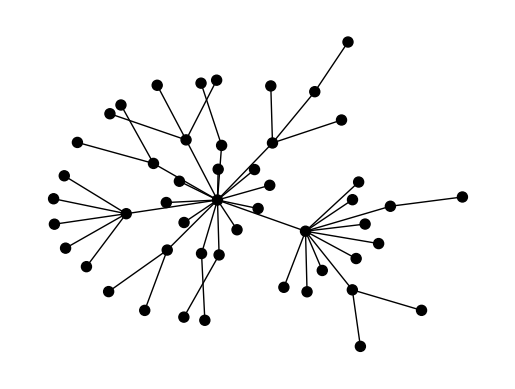

In [193]:
H = fn.find_skel(G)
fn.display_network(H)

For further analysis, we can find a list of the edge IDs from the original network which are in the network skeleton using `fn.find_skeleton_eids`. 

In [205]:
help(fn.find_skeleton_eids)

Help on function find_skeleton_eids in module fractalnetworks.networkskeleton:

find_skeleton_eids(G, H=None, ebcs=None)
    Finds a list of edge IDs for edges in the skeleton of G.
    
    Args:
        G (igraph.Graph)                  : The network to be analysed.
        H (:obj:`igraph.Graph`, optional) : The skeleton of the network, if known. Default is None.
        ebcs (:obj:`list`, optional)      : The edge betweenness centralities of the network, if known. Default is None.
    
    Returns:
        (list) : List of IDs of edges in G which are in the skeleton of G.



In [201]:
fn.find_skeleton_eids(G)

[1,
 2,
 35,
 49,
 30,
 6,
 37,
 75,
 45,
 33,
 94,
 7,
 70,
 67,
 24,
 28,
 43,
 9,
 64,
 84,
 54,
 78,
 73,
 79,
 81,
 47,
 59,
 16,
 62,
 89,
 55,
 41,
 26,
 17,
 50,
 65,
 22,
 14,
 95,
 72,
 20,
 3,
 92,
 87,
 39,
 86,
 52,
 58,
 31]

We can also find the betweenness centralities of the edges in the skeleton and not in the skeleton, for comparison, using `fn.find_skeleton_edge_betweenness`.

In [207]:
help(fn.find_skeleton_edge_betweenness)

Help on function find_skeleton_edge_betweenness in module fractalnetworks.networkskeleton:

find_skeleton_edge_betweenness(G, H=None, ebcs=None)
    Finds the edge betweenness centralities of edges in the skeleton of the network.
    
    Args:
        G (igraph.Graph)                  : The network to be analysed.
        H (:obj:`igraph.Graph`, optional) : The skeleton of the network, if known. Default is None.
        ebcs (:obj:`list`, optional)      : The edge betweenness centralities of the network, if known. Default is None.
    
    Returns:
        (tuple) : A tuple containing two lists, specifically:
                    a list of edge betweenness centralities of edges in the skeleton;
                    and a list of edge betweenness centralities of edges not in the skeleton.



In [209]:
skeleton_ebcs, non_skeleton_ebcs = fn.find_skeleton_edge_betweenness(G)

In [211]:
_, _, skel_mean_bc, _, _, _ = fn.analyse_betweenness_centrality(G, bcs=skeleton_ebcs)
_, _, non_skel_mean_bc, _, _, _ = fn.analyse_betweenness_centrality(G, bcs=non_skeleton_ebcs)
print("The mean edge betweenness centrality of edges in the skeleton is {0}.".format(skel_mean_bc))
print("The mean edge betweenness centrality of edges in the non-skeleton is {0}.".format(non_skel_mean_bc))

The mean edge betweenness centrality of edges in the skeleton is 0.03683707680167488.
The mean edge betweenness centrality of edges in the non-skeleton is 0.017378477295569135.


<h1> References

[1] K. Hamilton, "Origins of Fractality in Complex Networks" *MSc Thesis* 

[2] E. Zakar-Poly ́ak, M. Nagy, and R. Molontay, “Towards a better understanding of the characteristics of fractal
networks,” Applied Network Science, vol. 8, pp. 1–34, 2022

[3] Kitsak, M. et al. “Betweenness centrality of fractal and nonfractal scale-free model networks and tests on
real networks”. Physical review. E, Statistical, nonlinear, and soft matter physics 75, pp. 056115–056115, 2007